Data
  classes  m1  m2  total
0     cse  10  40     50
1     csd  20  20     40
2     ece  30  10     40
3   civil  40  30     70
Percentage array
[[20 80]
 [50 50]
 [75 25]
 [57 43]]
Stacked bar chart with percentage representation


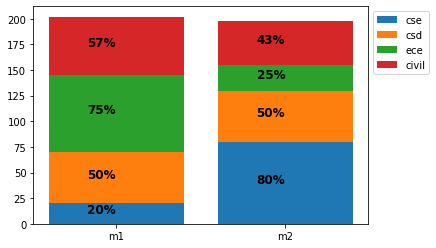

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data=pd.read_excel(r'/content/pw2.xlsx')
print("Data")
print(data)
data1=data
col=list(data.columns)
#print(col)    #column names
f0=col[0]
f1=col[len(col)-1]
temp=[]
for i in range(1,len(col)-1):
    temp.append(col[i])
#print(temp)         #X-axis names or subject names
m=[]
for i in col:
    m.append(list(data[i]))
#print(m)      #column values as list
v=len(m)
#print(v)            #length of m
f=[]
for i in m[0]:
    f.append(i)
#print(f)    #starting column value
tot=list(m[v-1])
#print(tot)  #last column values
sub=m
sub.pop(0)
sub.pop(-1)
l=[]
for i in sub:
    res=[round(((i/t)*100)) for i,t in zip(i,tot)]   #calculating percentage
    l.append(res)
#print(l)    #percentage list
a=np.array(l)
print("Percentage array")
z=a.T       #percentage array
print(z)
van=pd.DataFrame(z)        #data frame for the percentage representation in bar plot
van=van.T
#print(van)
print("Stacked bar chart with percentage representation")
plt.bar(temp,z[0])
b=np.array([0]*len(temp))
for i in range(1,len(z)):
        b=b+z[i-1]
        plt.bar(temp,z[i],bottom=b)
for n, x in enumerate([*van.index.values]):
    for (proportion, y_loc) in zip(van.loc[x],
                                   van.loc[x].cumsum()):          #percentages in barplot
               
        plt.text(x=n - 0.17,
                  y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion, 1)}%',
                 color="black",
                 fontsize=12,
                 fontweight="bold")
plt.legend(f,loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.show()